# SCANPLOT - Um sistema de plotagem simples para o SCANTEC

SCANPLOT_V1.1.0a

<span style="float:right"><img src="img/logo_scantec.png" width=180 height=180 /></span>O SCANPLOT é um módulo escrito em linguagem Python preparado para ler e plotar as tabelas com as estatísticas do Sistema Comunitário de Avaliação de modelos Numéricos de Tempo e Clima (SCANTEC*). O seu uso pode ser feito por meio da linha de comando ou através do Jupyter Notebook. O SCANPLOT transforma as tabelas do SCANTEC em dataframes do Pandas e pode ser facilmente extendido a partir da introdução de funções para a plotagem destes dataframes na forma como o usuário precisar.

O módulo `scanplot` possui as seguintes funções:

1. `read_namelists`: esta função lê os arquivos de namelist e definições dos modelos do SCANTEC;
2. `get_dataframe`: esta função transforma uma ou mais tabelas em dataframes do Pandas, acessíveis por meio de um dicionário;
3. `plot_lines`: esta função plota gráficos de linhas a partir dos dataframes;
4. `plot_lines_tStudent`: esta função plota gráficos de linhas a partir dos dataframes, acompanhados do teste de significância t de Student;
5. `plot_scorecard`: esta função plota um scorecard a partir dos dataframes;
6. `plot_dTaylor`: esta função plota um diagrama de Taylor a partir dos dataframes.

As funções possuem formas específicas de utilização. Para saber como utilizá-las, carregue primeiro o módulo `scanplot`:

```Python
import scanplot
```

ou 

```Python
import scanplot as sc
```

E em seguida, acesse a documentação da função digitando uma das duas formas a seguir:

```Python
help(read_namelists)
```

ou

```Python
print(red_namelists.__doc__)
```

---
*[de MATTOS, J. G. Z.](http://lattes.cnpq.br/4563659436339486); [SAPUCCI, L. F.](http://lattes.cnpq.br/8285827971934692). **SCANTEC - SISTEMA COMUNITÁRIO DE AVALIAÇÃO DE MODELOS NUMÉRICOS DE TEMPO E CLIMA. 2017.** Patente: Programa de Computador. Número do registro: BR512017000576-1, data de registro: 30/01/2017, Instituição de registro: INPI - Instituto Nacional da Propriedade Industrial. 

## Leitura dos namelists do SCANTEC

O SCANTEC é um software de linha de comando escrito em linguagem Fortran preparado para ler, interpolar e calcular as estatísticas básicas (Viés, Raiz do Erro Quadrático Médio e Correlação de Anomalias) a partir dos resultados de modelos de previsão numérica de tempo, como os modelos BAM, BRAMS e Eta. O SCANPLOT faz o trabalho de criar as estruturas de dados adequadas e plotar os resultados. As estruturas de dados criadas pelo SCANPLOT, são determinadas a partir das tabelas com o resumo das estatísticas calculadas pelo SCANTEC. Para utilizar o SCANPLOT, o usuário deve ler os arquivos de namelist e definições dos modelos utilizados nas avaliações, de forma que o software saiba quais foram as definições utilizadas pelo usuário e em que local estão armazenadas as tabelas com os resultados.

Para isso, basta utilizar a função `read_namelists` a partir do módulo principal `scanplot`. Esta e as demais funções, podem ser acessadas a partir do módulo principal, o qual deverá ser carregado:

In [1]:
import scanplot

Para conhecer como deve ser utilizada a função `read_namelists`, o usuário pode utilizar um dos comandos a seguir:

In [2]:
help(scanplot.read_namelists)

Help on function read_namelists in module core_scanplot:

read_namelists(basepath)
    read_namelists
    
    Esta função lê os namelists e arquivos de definições dos modelos do SCANTEC e
    retorna para o usuário dois dicionários, VarsLevs e Confs, com as informações lidas.
    
    Parâmetros de entrada
    ---------------------
        basepath : diretório raiz da instalação do SCANTEC.
        
    Resultados
    ----------
        VarsLevs : dicionário com as variáveis, níveis e nomes definidos no arquivo scantec.vars
        Confs    : dicionário com as definições contidas no arquivo scantec.conf
    
    Uso
    ---
        import scanplot
        
        data_vars, data_conf = scanplot.read_namelists("~/SCANTEC")



A função `read_namelists` recebe um caminho (raiz da instalação do SCANTEC) como parâmetro de entrada e retorna para o usuário dois dicionários, os quais contém as informações dos arquivos `scantec.conf` e `scantec.vars` do SCANTEC. Estes arquivos possuem as definições dos modelos (intervalo de tempo da avalação, nome do modelo, resolução, caminhos etc). Os nomes `data_vars` e `data_conf` são os nomes dos objetos que serão criados e que conterão os dicionários com as definições dos arquivos `scantec.vars` e `scantec.conf`, respectivamente. A escolha destes nomes fica a critério do usuário.

In [3]:
data_vars, data_conf = scanplot.read_namelists('/scripts/ensemble/SCANTEC.TESTS')

Para inspecionar o conteúdo e a estrutura dos dados contidos nos objetos `data_conf` e `data_vars`, basta digitar os nomes no prompt:

In [4]:
data_conf

{'Starting Time': datetime.datetime(2020, 6, 1, 0, 0),
 'Ending Time': datetime.datetime(2020, 8, 15, 0, 0),
 'Analisys Time Step': '24',
 'Forecast Time Step': '24',
 'Forecast Total Time': '360',
 'Time Step Type': 'forward',
 'History Time': '48',
 'scantec tables': '/scripts/ensemble/SCANTEC.TESTS/tables',
 'run domain number': '1',
 'run domain lower left lat': '-80',
 'run domain lower left lon': '0',
 'run domain upper right lat': '80',
 'run domain upper right lon': '360',
 'run domain resolution dx': '0.9375000000',
 'run domain resolution dy': '0.9375000000',
 'Reference Model Name': 'GFS_0p25_5levs',
 'Reference file': '/lustre_xc50/carlos_bastarz/GFS_subset/%iy4%im2%id2%ih2/gfs.t00z.pgrb2.0p25.f000.%iy4%im2%id2%ih2.ctl',
 'Experiments': {'GFS': ['GFS_0p25_5levs',
   '/lustre_xc50/carlos_bastarz/GFS_subset/%iy4%im2%id2%ih2/gfs.t00z.pgrb2.0p25.f%h3.%iy4%im2%id2%ih2.ctl'],
  'X666': ['BAM_TQ0666L064_33levs',
   '/lustre_xc50/ioper/data/BAM/TQ0666L064/%iy4%im2%id2%ih2/dataout/p

In [5]:
data_vars

{0: ('PSNM:000', 'Pressure reduced to MSL [hPa]'),
 1: ('TEMP:850', 'Absolute Temperature @ 850 hPa [K]'),
 2: ('TEMP:500', 'Absolute Temperature @ 500 hPa [K]'),
 3: ('TEMP:250', 'Absolute Temperature @ 250 hPa [K]'),
 4: ('UMES:925', 'Specific Humidity @ 925 hPa [g/Kg]'),
 5: ('UMES:850', 'Specific Humidity @ 850 hPa [g/Kg]'),
 6: ('UMES:500', 'Specific Humidity @ 500 hPa [g/Kg]'),
 7: ('AGPL:925', 'Inst. Precipitable Water @ 925 hPa [Kg/m2]'),
 8: ('ZGEO:850', 'Geopotential height @ 850 hPa [gpm]'),
 9: ('ZGEO:500', 'Geopotential height @ 500 hPa [gpm]'),
 10: ('ZGEO:250', 'Geopotential height @ 250 hPa [gpm]'),
 11: ('UVEL:850', 'Zonal Wind @ 850 hPa [m/s]'),
 12: ('UVEL:500', 'Zonal Wind @ 500 hPa [m/s]'),
 13: ('UVEL:250', 'Zonal Wind @ 250 hPa [m/s]'),
 14: ('VVEL:850', 'Meridional Wind @ 850 hPa [m/s]'),
 15: ('VVEL:500', 'Meridional Wind @ 500 hPa [m/s]'),
 16: ('VVEL:250', 'Meridional Wind @ 250 hPa [m/s]')}

Com as informações dos arquivos de namelist do SCANTEC carregados, o próximo passo é ler as tabelas geradas na avaliação com o SCANTEC e transformá-las em dataframes do Pandas. Para isso, o usuário deverá utilizar a função `get_dataframe` do módulo `scanplot`.

Da mesma forma como foi feito com a função `read_namelists`, pode-se digitar o comando `print(funcao.__doc__)` ou simplesmente, `help(funcao)` para descobrir como a função deve ser utilizada:

In [6]:
help(scanplot.get_dataframe)

Help on function get_dataframe in module data_structures:

get_dataframe(dataInicial, dataFinal, Stats, Exps, outDir, series)
    get_dataframe
    
    Esta função transforma a(s) tabela(s) do SCANTEC em dataframe(s).
    
    Parâmetros de entrada
    ---------------------
        dataInicial : objeto datetime com a data inicial do experimento
        dataFinal   : objeto datetime com a data final do experimento
        Stats       : lista com os nomes das estatísticas a serem processadas
        Exps        : lista com os nomes dos experimentos
        outDir      : string com o diretório com as tabelas do SCANTEC
        series      : valor Booleano para ler uma série temporal das tabelas do SCANTEC
                      series=False, lê as tabelas do SCANTEC geradas para a avaliação de um período
                      series=True, lê as tabelas do SCANTEC geradas para a avaliação dos dias dentro de um período
    
    Resultado
    ---------
        Dicionário com o(s) dataframe(s

A função `get_dataframe` recebe uma série de parâmetros de entrada e retorna um dicionário com uma ou mais tabelas que já estarão na estrutura de dataframe do Pandas. Na célula a seguir, serão definidos os valores de entrada da função `get_dataframe` a partir dos dicionários `data_conf` e `data_vars`, criados anteriormente.

Observe que os parâmetros `Vars` e `Stats` são atribuídos de formas diferentes dos demais. O parâmetro `Stats` é uma lista que deve possuir pelo menos um elemento e ele sempre deve possuir a forma `Stat = [...]`. Na versão atual do SCANPLOT, o usuário pode escolher as estatísticas `ACOR` (correlação de anomalias), `RMSE` (raiz do erro quadrático médio) e `VIES` (viés), em qualquer ordem ou combinação entre elas. 

O parâmetro `Vars` também é uma lista, mas é definido de forma diferente. O usuário deve observar que no dicionário `data_vars`, para cada índice está associada uma tupla do tipo `('VAR:LEV', 'Nome da Variável @ Nível hPa [unidade]')`.  Isto foi feito para facilitar ao usuário a escolha da variável, pois ao invés de se digitar o nome da variável, basta escolher pelo menos um dos índices do dicionário `data_vars` que deseja, da seguinte forma `Vars = list(map(data_vars.get,[1,2,3,...]`. 

In [7]:
dataInicial = data_conf['Starting Time']
dataFinal = data_conf['Ending Time']
Vars = list(map(data_vars.get,[11,12,13])) # ou [*map(data_vars.get,[12,14])]
Stats = ['ACOR', 'RMSE', 'VIES']
Exps = list(data_conf['Experiments'].keys()) # ou [*data_conf["Experiments"].keys()]
outDir = data_conf['Output directory']

Com a definição dos parâmetros de entrada da função `get_dataframe`, a sua utilização é feita da seguinte forma:

In [8]:
dTable = scanplot.get_dataframe(dataInicial,dataFinal,Stats,Exps,outDir,series=False)

Na chamada da função `get_dataframe`, o objeto `dTable` é um dicionário que deverá conter as tabelas escolhidas pelo usuário a partir do ajuste dos parâmetros de entrada da função. Para inspecionar o conteúdo do dicionário `dTable`, basta digitar no prompt:

In [9]:
dTable

{'ACORGFS_20200601002020081500T.scan':    %Previsao  psnm:000  temp:850  temp:500  temp:250  umes:925  umes:850  \
 0          0     1.000     1.000     1.000     1.000     1.000     1.000   
 1         24     0.870     0.972     0.970     0.947     0.629     0.138   
 2         48     0.773     0.956     0.952     0.924     0.618     0.105   
 3         72     0.721     0.948     0.944     0.915     0.593     0.097   
 4         96     0.688     0.944     0.939     0.911     0.582     0.092   
 5        120     0.662     0.940     0.936     0.910     0.586     0.097   
 6        144     0.647     0.938     0.934     0.908     0.566     0.090   
 7        168     0.638     0.936     0.932     0.907     0.595     0.091   
 
    umes:500  agpl:925  zgeo:850  zgeo:500  zgeo:250  uvel:850  uvel:500  \
 0     1.000     1.000     1.000     1.000     1.000     1.000     1.000   
 1     0.033     0.933     0.943     0.979     0.987     0.743     0.779   
 2     0.025     0.903     0.895     0.

No dicionário `dTable`, observe que foram carregadas as tabelas referente às estatísticas escolhidas (`VIES`, `RMS` e `ACOR`). Para visualizar o dataframe da tabela, basta passar o nome da tabela como argumento do dicionário dTable, como em `dTable['NOME_TABELA']`. Veja o exemplo a seguir:

In [10]:
dTable['ACORX666_20200601002020081500T.scan']

%Previsao  psnm:000  temp:850  temp:500  temp:250  umes:925  umes:850  \
0           0     0.999     0.999     1.000     1.000     0.256     0.162   
1          24     0.978     0.988     0.997     0.993     0.235     0.142   
2          48     0.965     0.983     0.994     0.985     0.227     0.129   
3          72     0.944     0.977     0.990     0.977     0.216     0.116   
4          96     0.915     0.970     0.984     0.968     0.210     0.108   
5         120     0.883     0.964     0.978     0.958     0.205     0.102   
6         144     0.850     0.958     0.973     0.950     0.202     0.098   
7         168     0.819     0.953     0.967     0.943     0.202     0.095   
8         192     0.788     0.948     0.961     0.937     0.201     0.091   
9         216     0.754     0.943     0.956     0.931     0.201     0.090   
10        240     0.726     0.940     0.952     0.926     0.199     0.088   
11        264     0.711     0.937     0.949     0.922     0.198     0.087   

    umes:500  agpl:925  zgeo:850  zgeo:500  zgeo:250  uvel:850  uvel:500  \
0      0.072     1.000     1.000     1.000     1.000     0.999     1.000   
1      0.068     0.985     0.995     0.999     1.000     0.936     0.972   
2      0.063     0.969     0.990     0.998     0.999     0.903     0.946   
3      0.059     0.953     0.980     0.995     0.997     0.863     0.912   
4      0.054     0.938     0.966     0.990     0.994     0.819     0.870   
5      0.050     0.923     0.950     0.984     0.990     0.773     0.825   
6      0.047     0.911     0.933     0.977     0.986     0.731     0.782   
7      0.043     0.901     0.918     0.971     0.981     0.693     0.740   
8      0.041     0.892     0.902     0.965     0.977     0.656     0.701   
9      0.039     0.884     0.884     0.958     0.973     0.622     0.666   
10     0.037     0.879     0.870     0.952     0.970     0.596     0.637   
11     0.035     0.875     0.861     0.949     0.967     0.581     0.614   

    uvel:250  vvel:850  vvel:500  vvel:250  
0      1.000     0.999     1.000     1.000  
1      0.980     0.892     0.951     0.963  
2      0.959     0.828     0.903     0.918  
3      0.930     0.756     0.837     0.852  
4      0.895     0.671     0.749     0.766  
5      0.857     0.583     0.648     0.668  
6      0.821     0.498     0.549     0.572  
7      0.784     0.428     0.456     0.475  
8      0.752     0.363     0.365     0.382  
9      0.722     0.295     0.281     0.292  
10     0.695     0.246     0.212     0.223  
11     0.675     0.212     0.164     0.179

## Explorando os dataframes

Dataframes do Pandas são estruturas de dados tabulados que possuem uma série de funções e métodos que podem também ser aplicados com as tabelas do SCANTEC. Veja nos exemplos abaixo, diferentes formas de selecionar as colunas e plotar os dados de forma individual ou agrupada.

No exemplo a seguir, é feita a seleção da coluna referente à correleção de anomalias da temperatura absoluta em 850 hPa. Para isso, utiliza-se o método `loc` para fazer a localização da variável no dataframe. O método `loc` em um dataframe indexa os valores da tabela a partir dos índices da linha e da coluna, respectivamente (`loc[linha,coluna]`):

In [11]:
dTable['ACORX666_20200601002020081500T.scan'].loc[:,'temp:850']

0     0.999
1     0.988
2     0.983
3     0.977
4     0.970
5     0.964
6     0.958
7     0.953
8     0.948
9     0.943
10    0.940
11    0.937
Name: temp:850, dtype: float64

O dataframe do Pandas permite também realizar a plotagem rápida da seleção realizada utilizando a função `plot()`. Veja no exemplo a seguir:

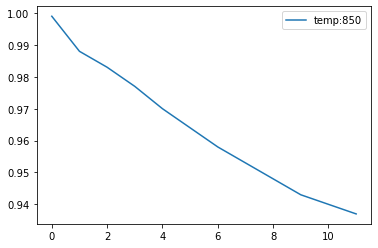

In [12]:
dTable['ACORX666_20200601002020081500T.scan'].loc[:,['temp:850']].plot()

Com o método `loc`, é possível também escolher mais do que uma coluna. Veja o exemplo a seguir e compare-o com o exemplo anterior:

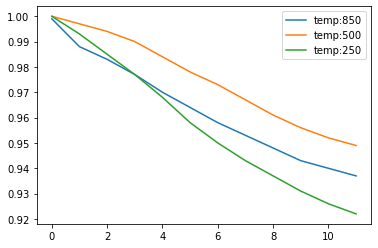

In [13]:
dTable['ACORX666_20200601002020081500T.scan'].loc[:,['temp:850', 'temp:500', 'temp:250']].plot()

O método `loc` realiza a indexação a partir dos rótulos das colunas. Utilize o método `iloc` para realizar a subseleção a partir dos índices das linhas e colunas:

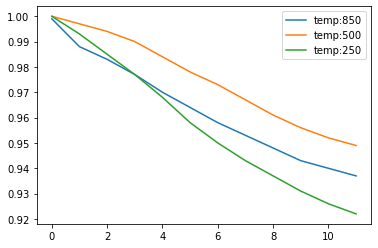

In [14]:
axes = dTable['ACORX666_20200601002020081500T.scan'].iloc[:,2:5].plot()

Quando múltiplas colunas são selecionadas, pode-se optar pela plotagem em grupo. Para isso, basta passar o argumento `subplots=True` para dentro da função `plot()`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc7d031b50>,
      dtype=object)

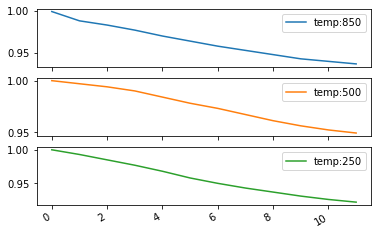

In [15]:
dTable['ACORX666_20200601002020081500T.scan'].loc[:,['temp:850', 'temp:500', 'temp:250']].plot(subplots=True)

Veja a seguir o mesmo exemplo anterior, mas utilizando o método `iloc`:

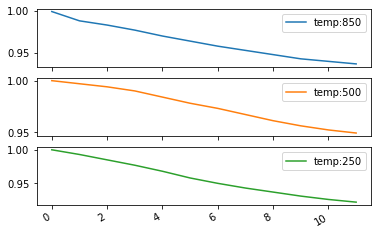

In [16]:
axes = dTable['ACORX666_20200601002020081500T.scan'].iloc[:,2:5].plot(subplots=True)

Outras opções de plotagem com o Matplotlib podem ser passadas também para a função `plot()`, veja a seguir:

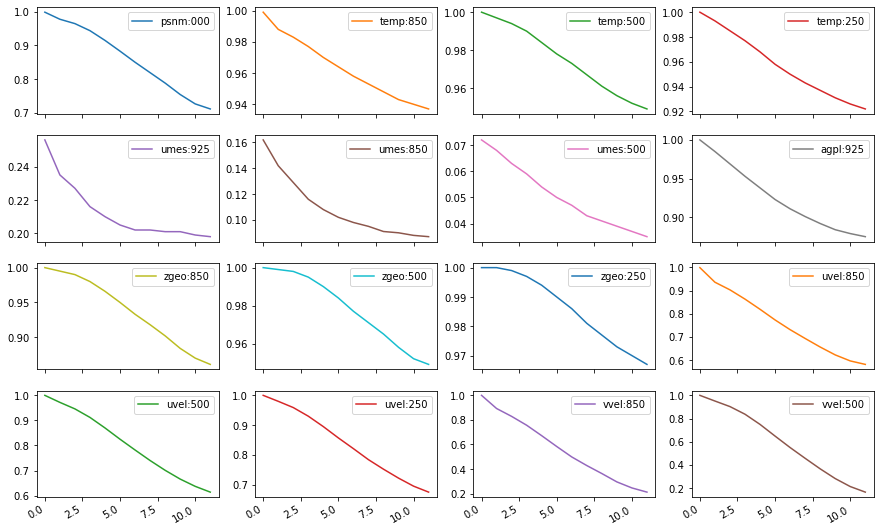

In [17]:
axes = dTable['ACORX666_20200601002020081500T.scan'].iloc[:,1:-1].plot.line(subplots=True, figsize=(15,10), layout=(4,4), sharex=True)

Com mais do que um experimento, é possível também plotá-los no mesmo gráfico. Veja a seguir como plotar duas colunas de dois dataframes diferentes (ie., duas tabelas do SCANTEC), no mesmo gráfico:

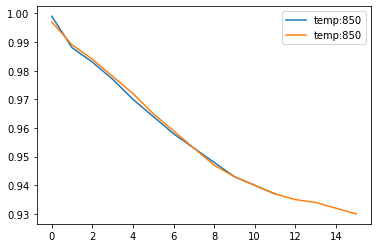

In [18]:
df_exp1 = dTable['ACORX666_20200601002020081500T.scan'].loc[:,['temp:850']]
df_exp2 = dTable['ACORT126_20200601002020081500T.scan'].loc[:,['temp:850']]
ax = df_exp1.plot()
df_exp2.plot(ax=ax)

## Funções de plotagem do SCANPLOT

As tabelas do SCANTEC como dataframes do Pandas, permitem o acesso às facilidades associados ao módulo. O SCANPLOT possui também algumas funções de plotagem que permitem a manipulação das tabelas em lotes. Neste seção, são apresentadas as funções básicas de plotagem.

### plot_lines

A função `plot_lines` realiza a plotagem das tabelas selecionadas a partir da utilização da função `get_dataframe`. Assim como foi feito anteriormente para as outras funções do SCANPLOT, a ajuda da função pode ser acessada com um dos comandos a seguir:

In [19]:
help(scanplot.plot_lines)

Help on function plot_lines in module plot_functions:

plot_lines(dTable, Vars, Stats, outDir, combine)
    plot_lines
    
    Esta função plota gráficos de linha a partir de um dicionário de dataframes com as tabelas do SCANTEC.
    
    Parâmetros de entrada
    ---------------------
        dTable  : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars    : lista com os nomes e níveis das variáveis
        Stats   : lista com os nomes das estatísticas a serem processadas
        outDir  : string com o diretório com as tabelas do SCANTEC
        combine : valor Booleano para combinar as curvas dos experimentos em um só gráfico
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        import scanplot 
        
        data_vars, data_conf = scanplot.read_namelists("~/SCANTEC")
        
        dataInicial = data_conf["Starting Time"]
        dataFinal = data_conf["Ending Time"]
       

Veja que a função `plot_lines` recebe como parâmetros de entrada o dicionário `dTable`, as listas `Vars` e `Stats` e o diretório de saída `outDir` que será utilizado para salvar as figuras produzidas. Veja a seguir como utilizar a função `plot_lines`:

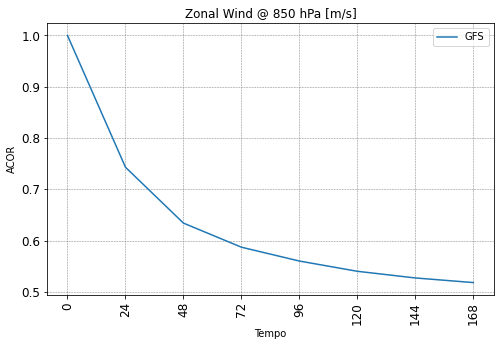

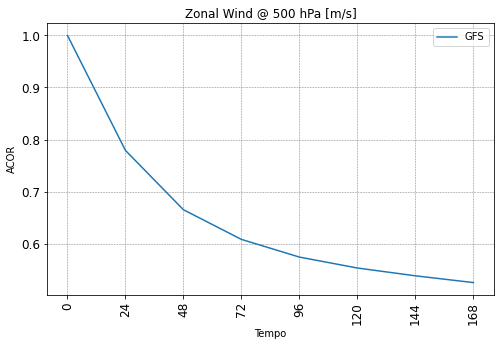

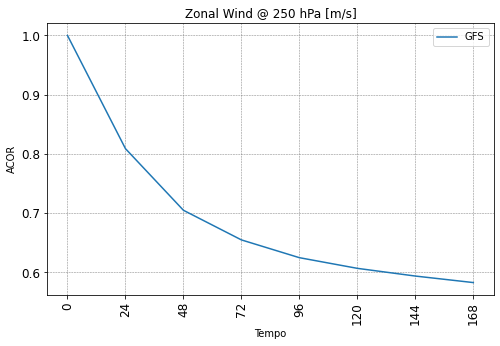

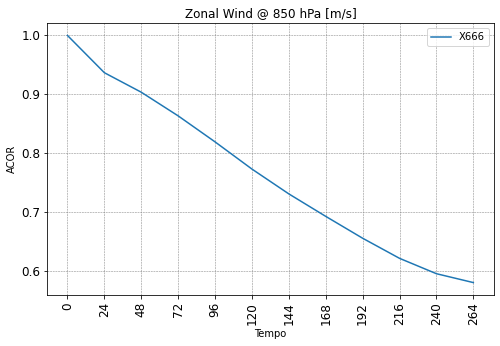

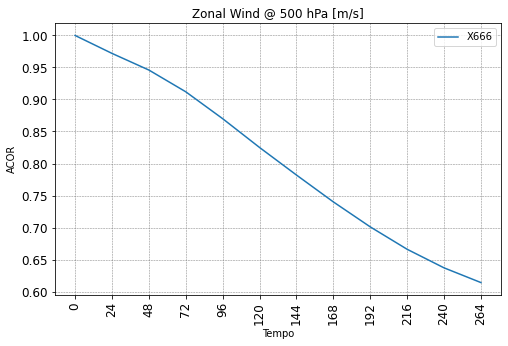

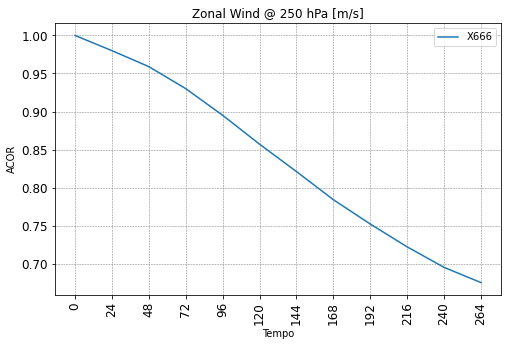

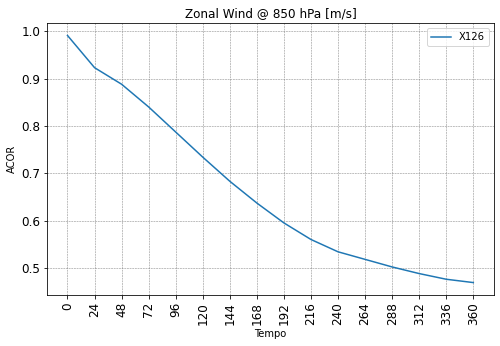

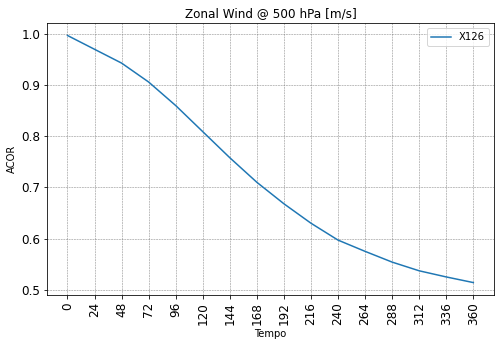

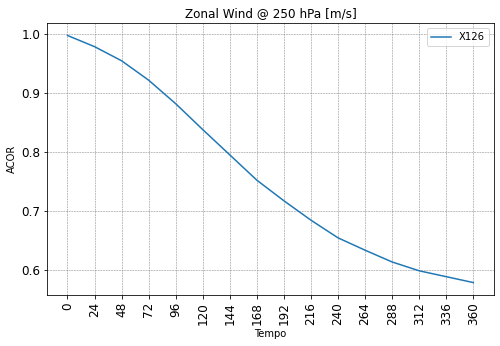

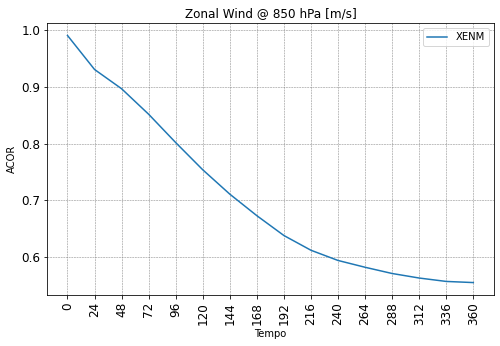

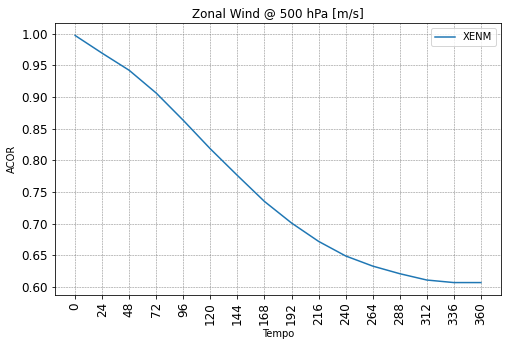

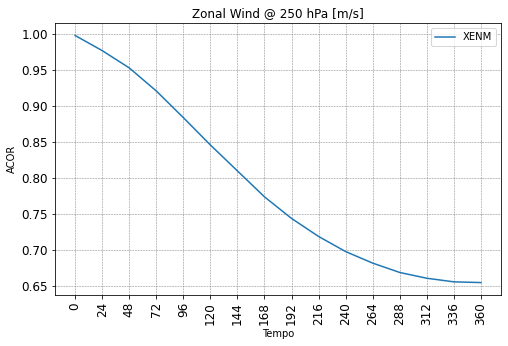

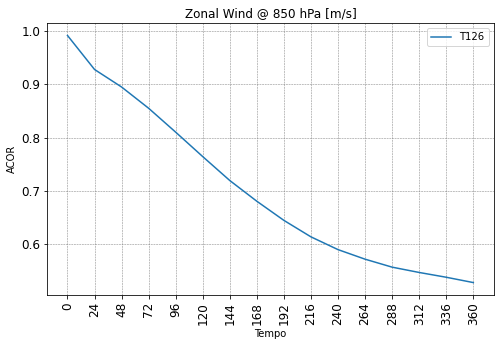

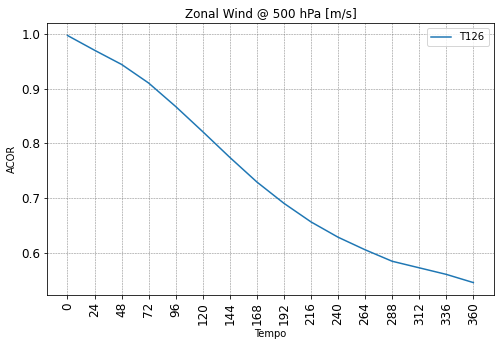

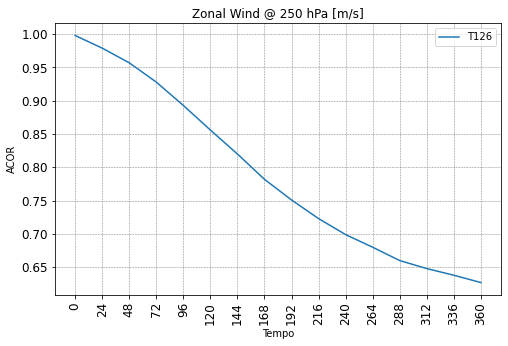

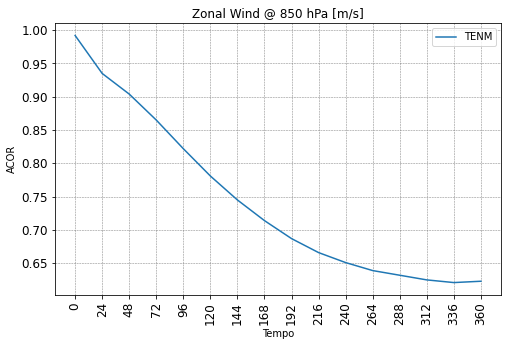

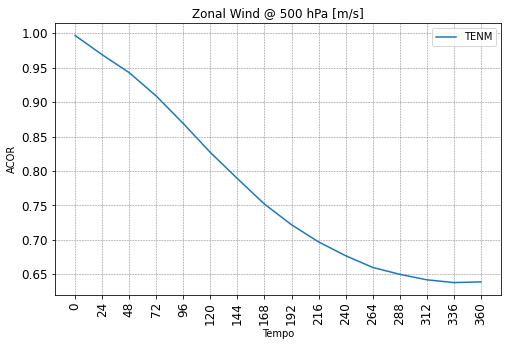

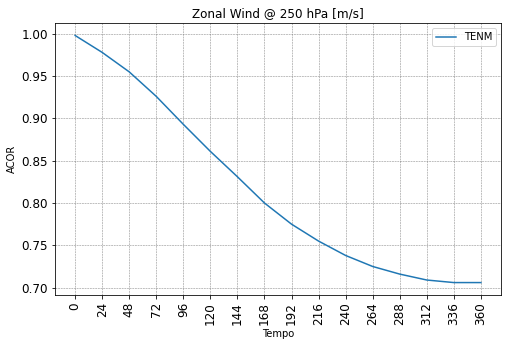

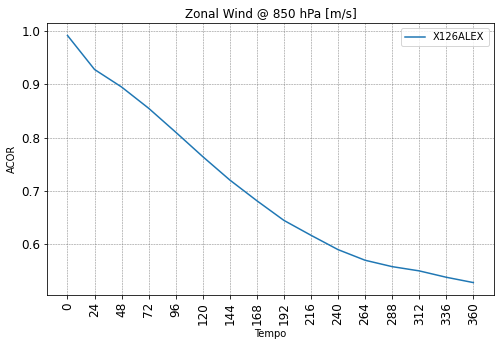

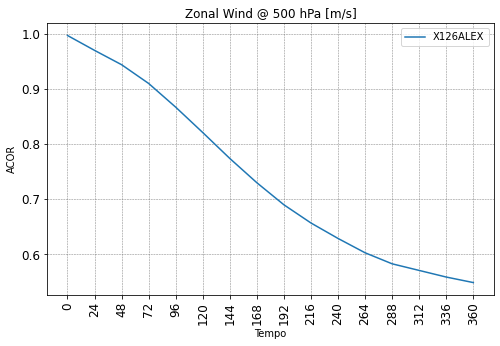

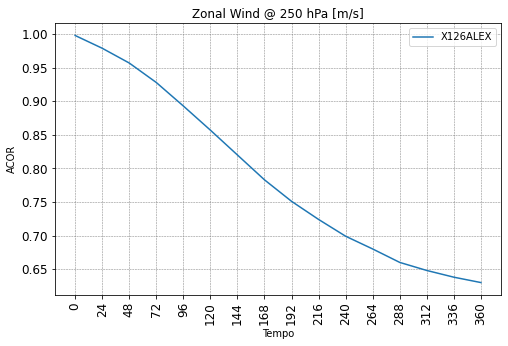

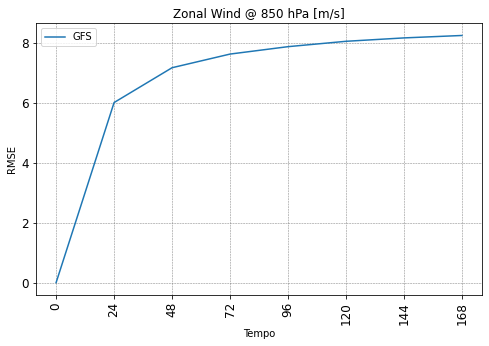

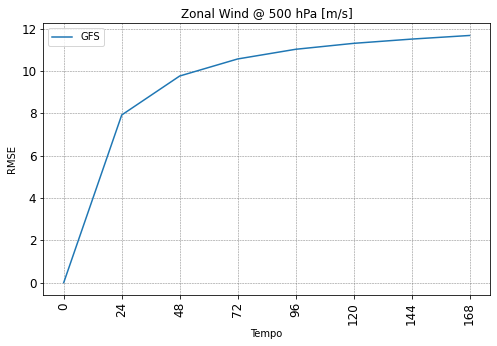

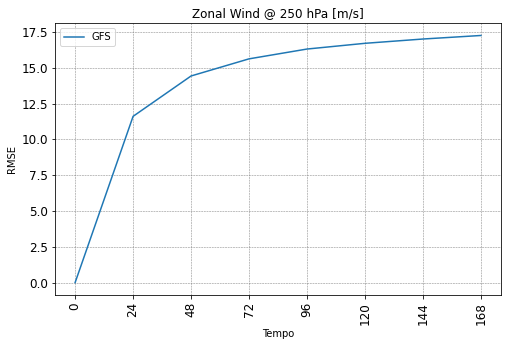

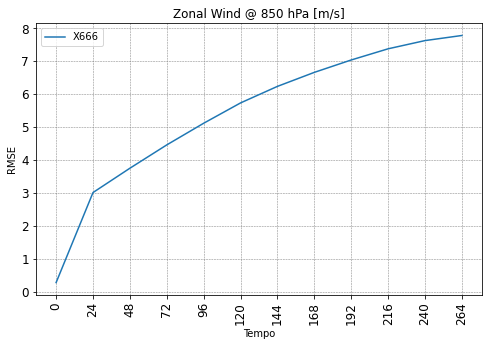

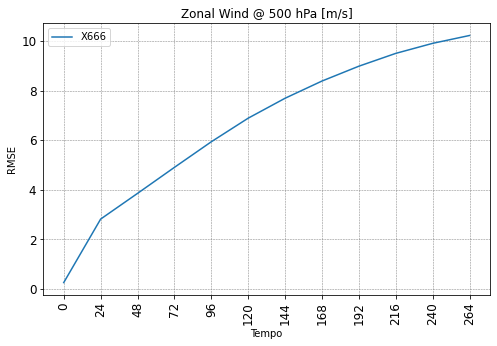

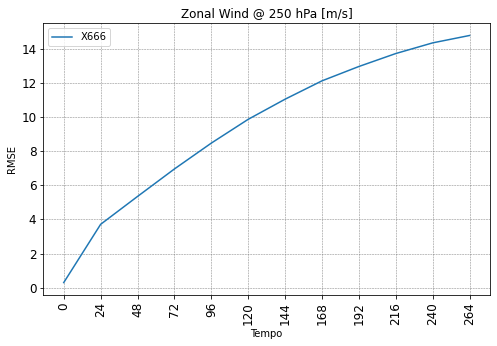

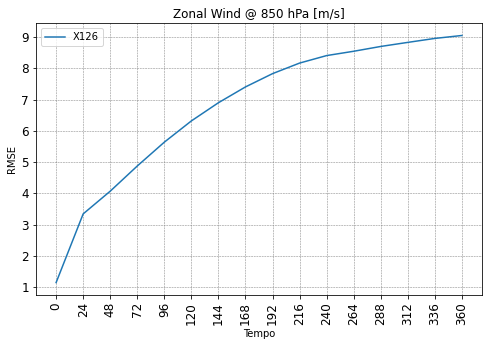

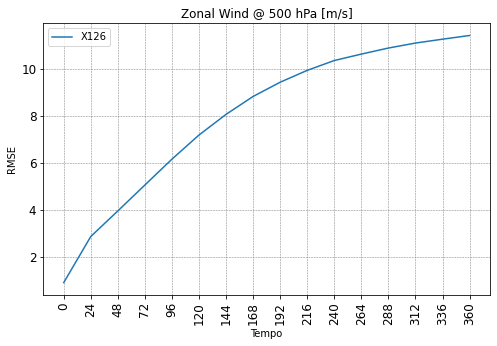

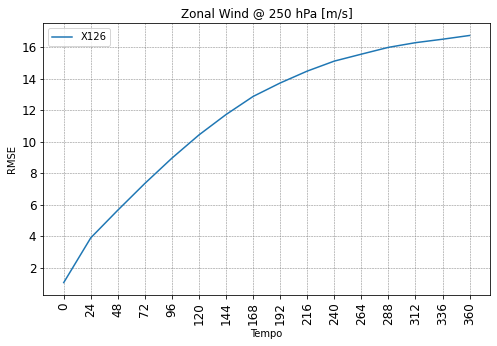

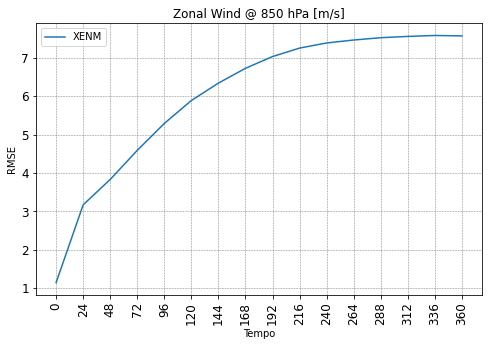

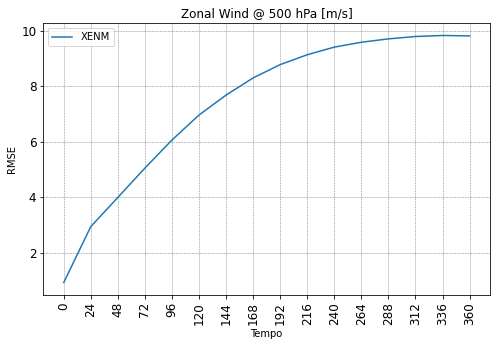

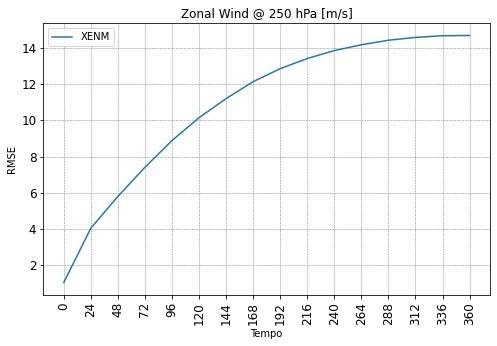

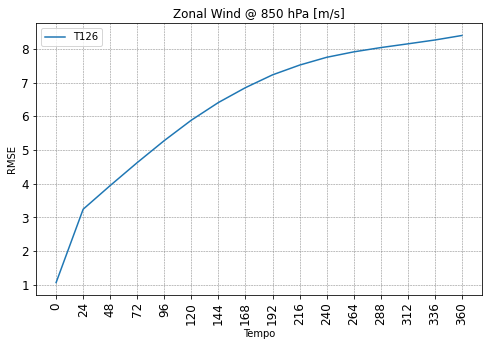

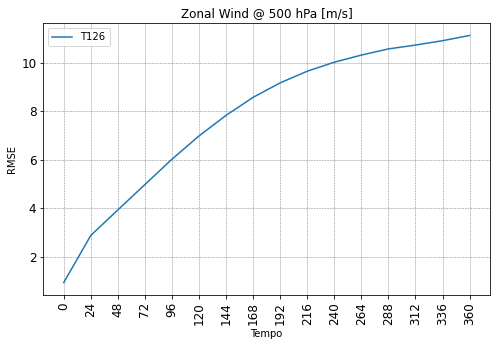

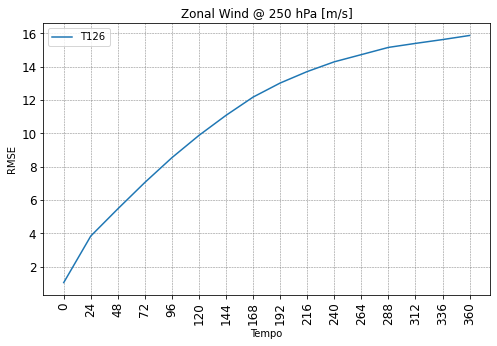

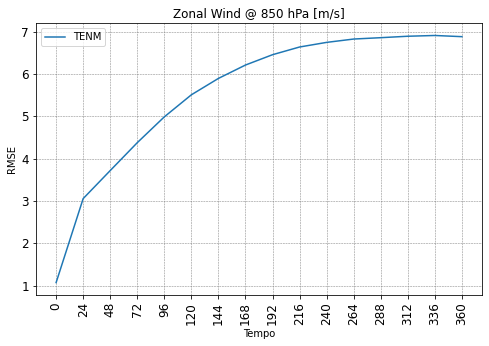

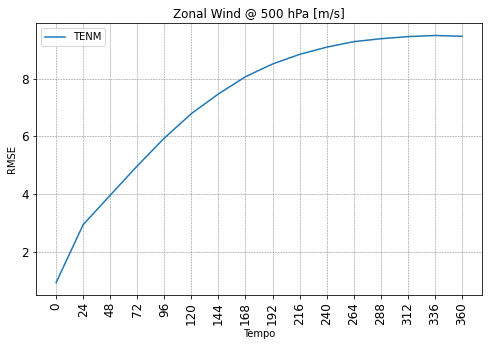

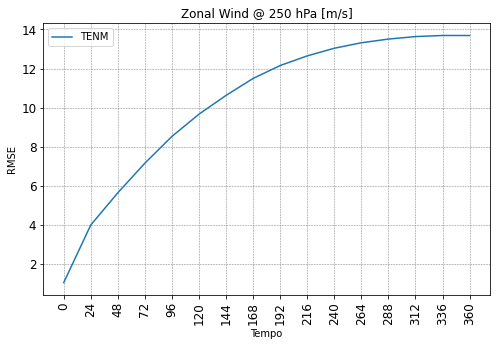

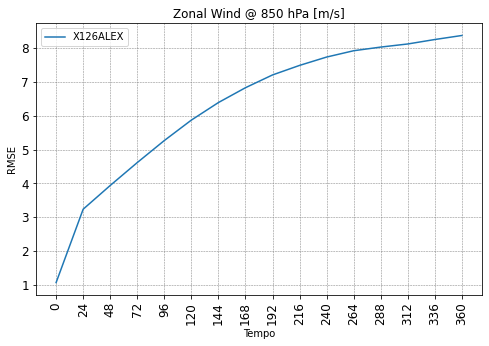

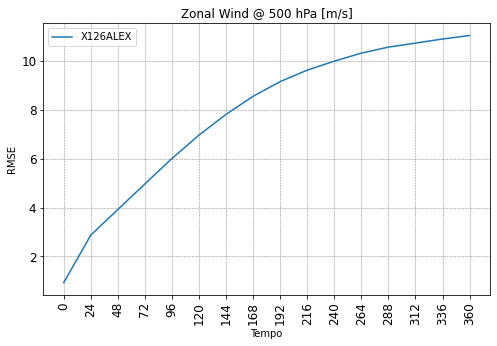

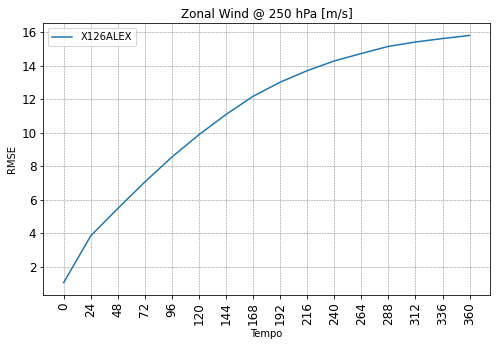

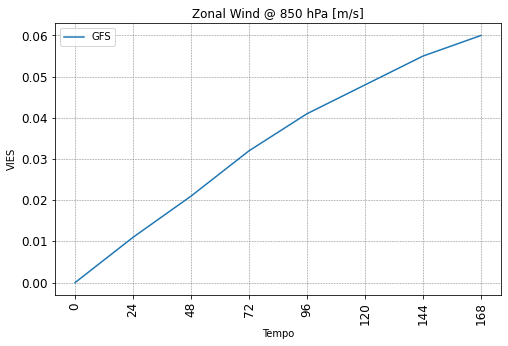

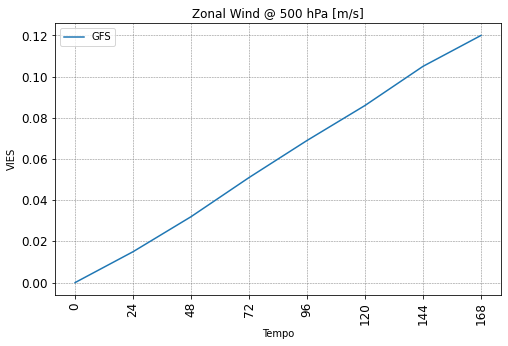

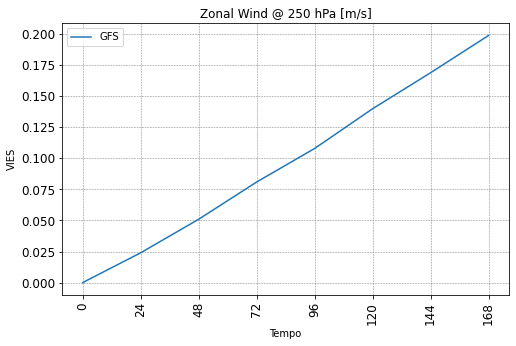

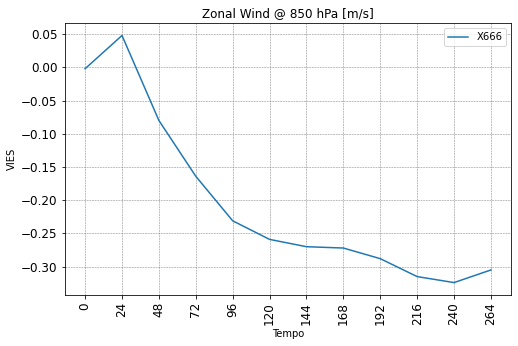

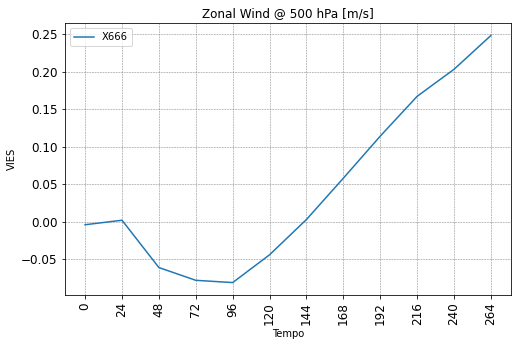

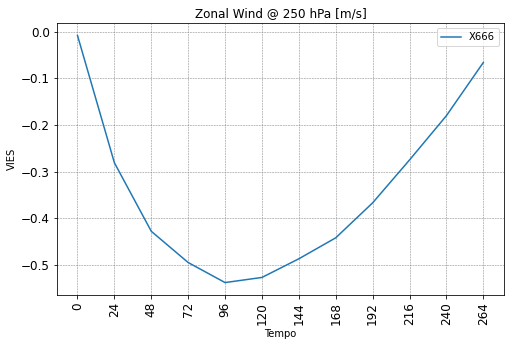

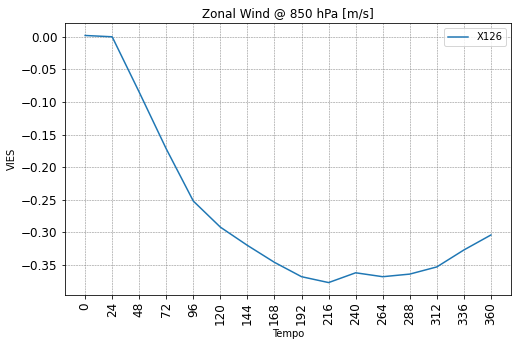

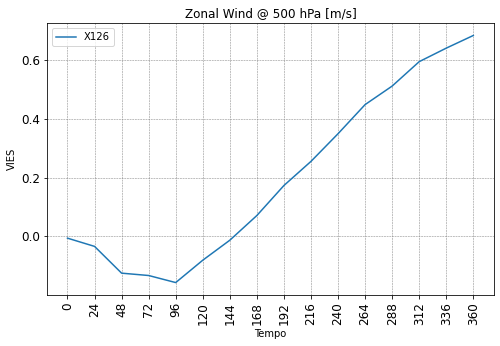

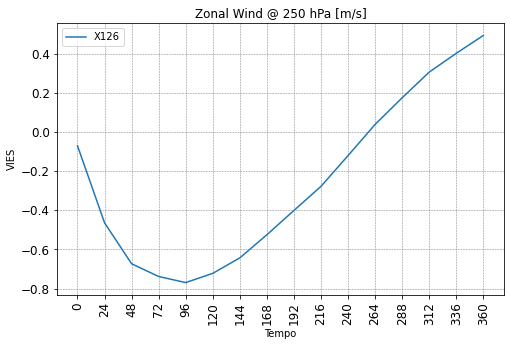

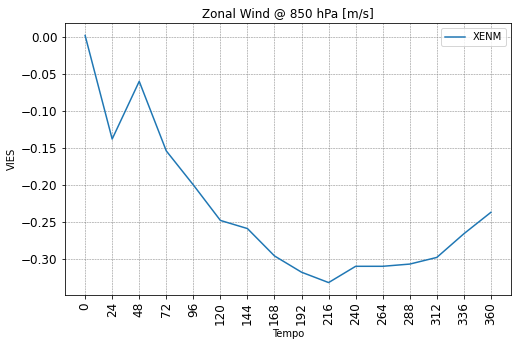

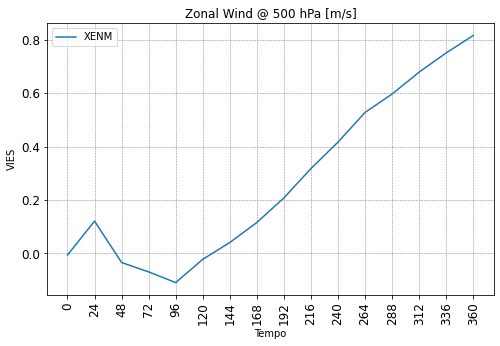

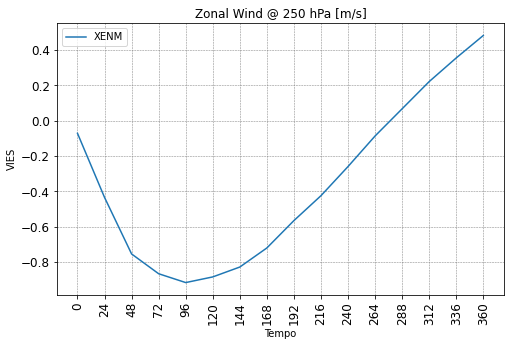

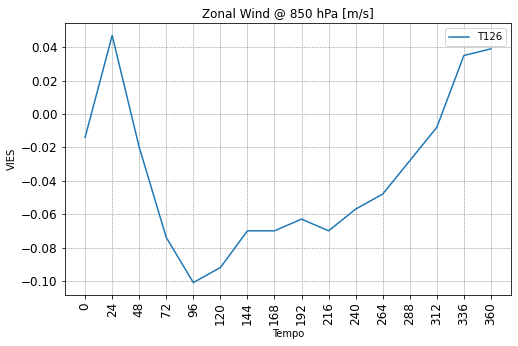

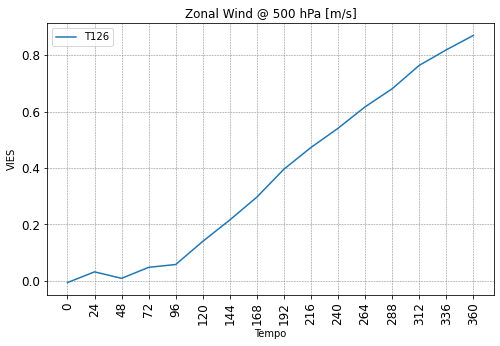

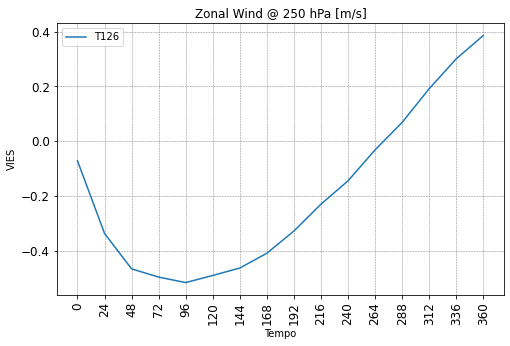

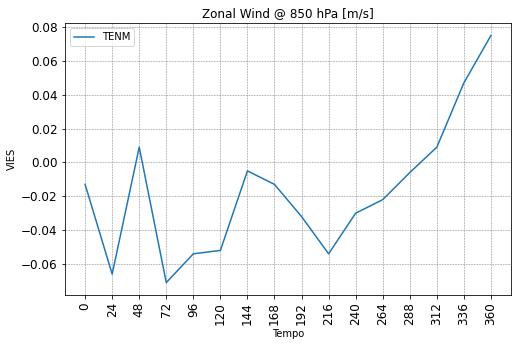

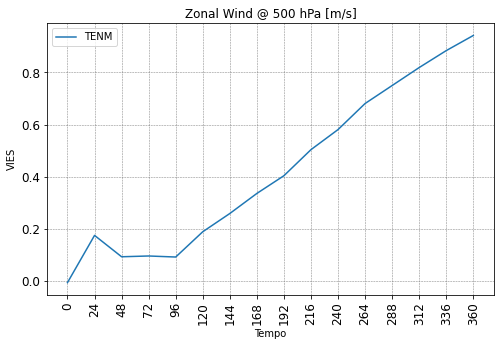

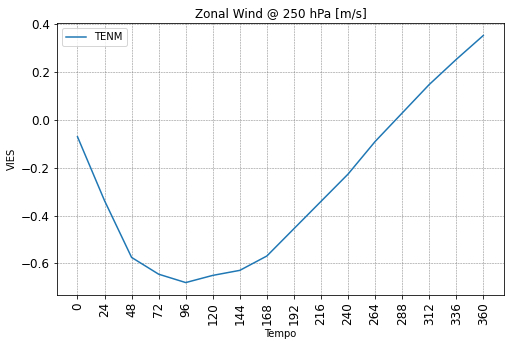

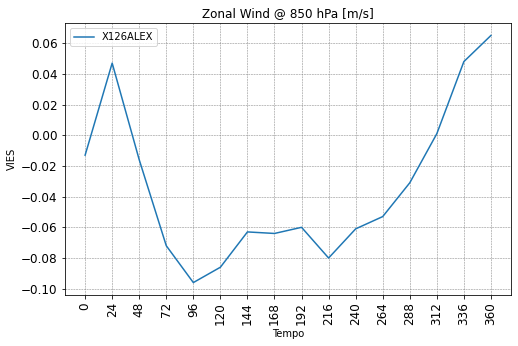

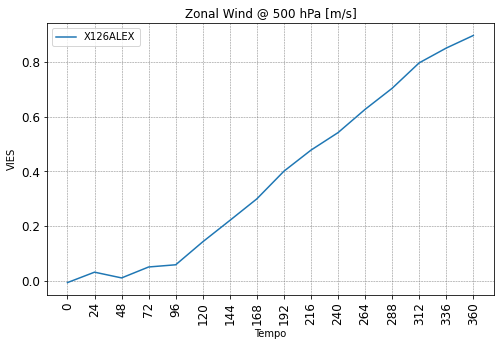

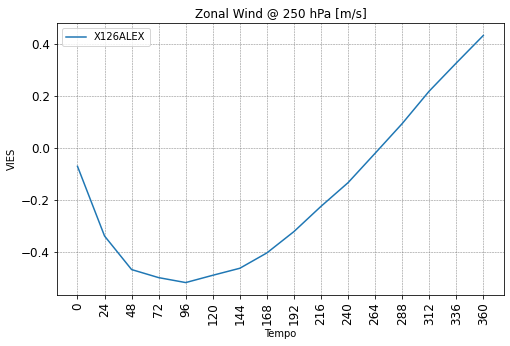

In [20]:
scanplot.plot_lines(dTable,Vars,Stats,outDir,combine=False)

Na função `plot_lines`, o parâmetro `combine=True` permite que as curvas dos experimentos sejam combinadas de acordo com a lista de variáveis `Vars` e estatísticas `Stats`. Veja o exemplo a seguir:

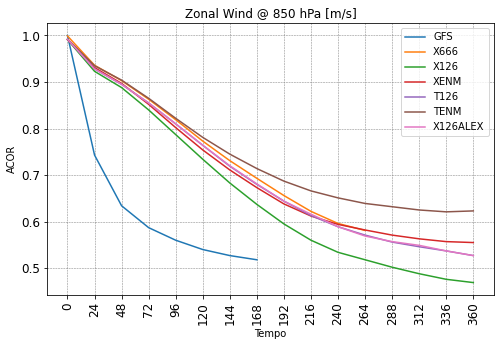

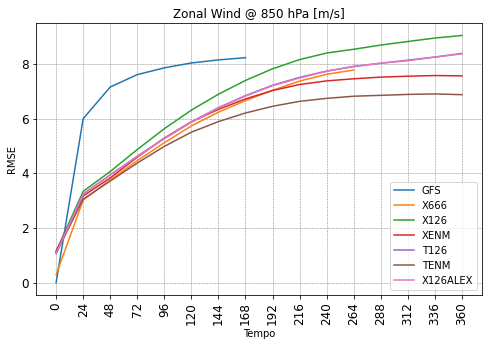

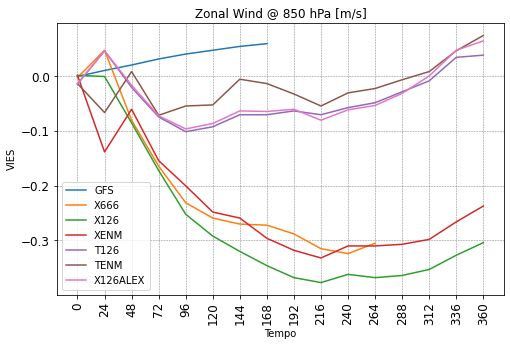

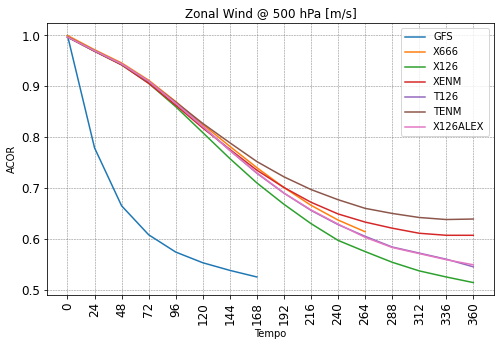

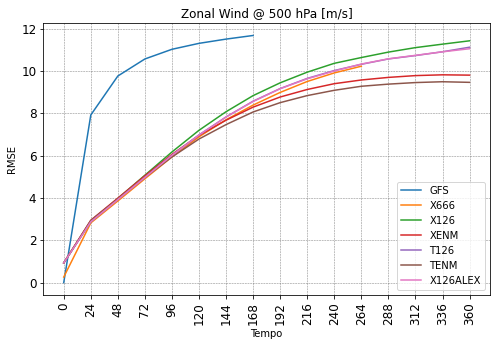

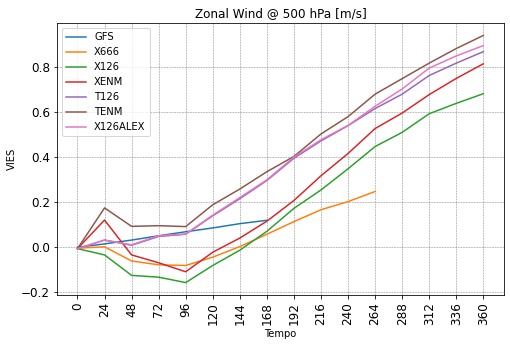

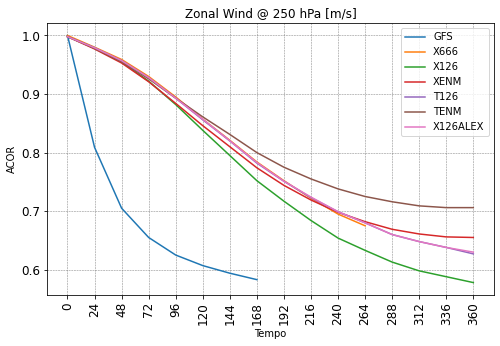

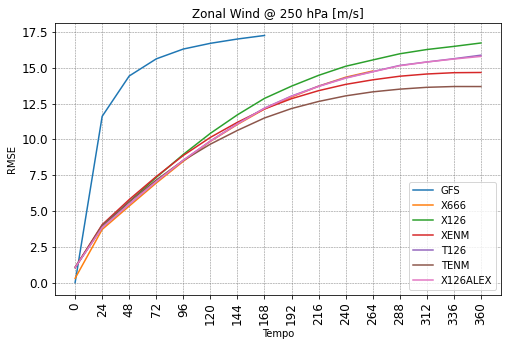

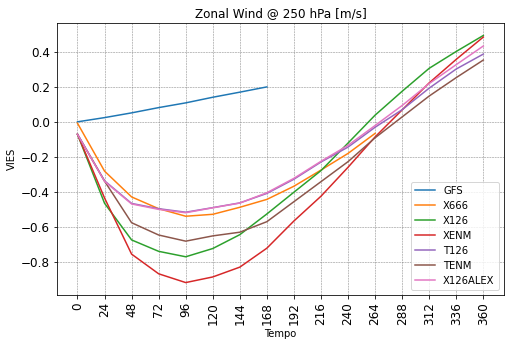

In [21]:
scanplot.plot_lines(dTable,Vars,Stats,outDir,combine=True)

### plot_scorecard

Outra função interessante do SCANPLOT é a `plot_scorecard`. Nesta função podem ser calculadas duas métricas que permitem quantificar a variação relativa entre dois experimentos avaliados pelo SCANTEC. As métricas aplicadas são o "Ganho Percentual*" e a "Mudança Fracional" e ambas podem ser calculadas com base nas tabelas de estatisticas do SCANTEC. Estas métricas podem ser utilizadas quando se quiser ter uma visão imadiata sobre as melhorias obtidas entre duas versões de um modelo ou entre dois experimentos de um mesmo modelo.

O Ganho Percentual é definido por:

$$Ganho_{STAT} = \frac{EXP2_{STAT} - EXP1_{STAT}}{EXP_{perfeito} - EXP1_{STAT}} \times 100$$

onde,

* $EXP1$: tabelas do experimento 1;
* $EXP2$: tabelas do experimento 2;
* $STAT$: pode ser o VIES, RMSE ou ACOR;
* $EXP_{perfeito}$: valor considerado quando o experimento é perfeito, ie., 0 quando VIES ou RMSE e 1 quando ACOR.

A Mudança Fracional é definida por:

$$MF_{STAT} = 1 - \frac{EXP2_{STAT}}{EXP1_{STAT}}$$

onde,

* $EXP1$: tabelas do experimento 1;
* $EXP2$: tabelas do experimento 2;
* $STAT$: pode ser o VIES, RMSE ou ACOR;

---
*[BAÑOS, I. H.](http://lattes.cnpq.br/6820161737155390); et al. **Impacto da Assimilação de Perfis de Refratividade do  Satélite Metop-B nas Previsões de Tempo do CPTEC/INPE Durante os Meses de Janeiro e Agosto de 2014.** Disponível em [link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862018000100065).

Para aprender a utilizar a função `plot_scorecard`, utilizae o comando a seguir:

In [22]:
help(scanplot.plot_scorecard)

Help on function plot_scorecard in module plot_functions:

plot_scorecard(dTable, Vars, Stats, Tstat, Exps, outDir)
    plot_scorecard
    
    Esta função calcula o "Ganho Percentual*" e a "Mudança Fracional*" a partir 
    das estatísticas do SCANTEC e plota os resultados na forma de um scorecard. 
    São necessários dois experimentos.
    
    *Banos et al., 2018: Impacto da Assimilação de Perfis de Refratividade do 
                         Satélite Metop-B nas Previsões de Tempo do CPTEC/INPE 
                         Durante os Meses de Janeiro e Agosto de 2014.
    
    Parâmetros de entrada
    ---------------------
        dTable  : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars    : lista com os nomes e níveis das variáveis
        Stats   : lista com os nomes das estatísticas a serem processadas
        Tstat   : tipo de score a ser calculado
        outDir  : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Figura

Como o scorecard tem a premissa de resumir as estatísticas calculadas indicando para quais variáveis e quando ele é melhor ou pior do que o outro experimento, é interessante considerar todas as variáveis contidas nas tabelas (pode-se escolher qualquer quantidade ou estatísticas). Neste caso, são considerados apenas os dois experimentos, `EXP1` e `EXP2`. Para isso, incrementamos a lista `Vars` com os índices das variáveis que serão utilizadas:

In [23]:
Vars = list(map(data_vars.get,[*data_vars.keys()]))

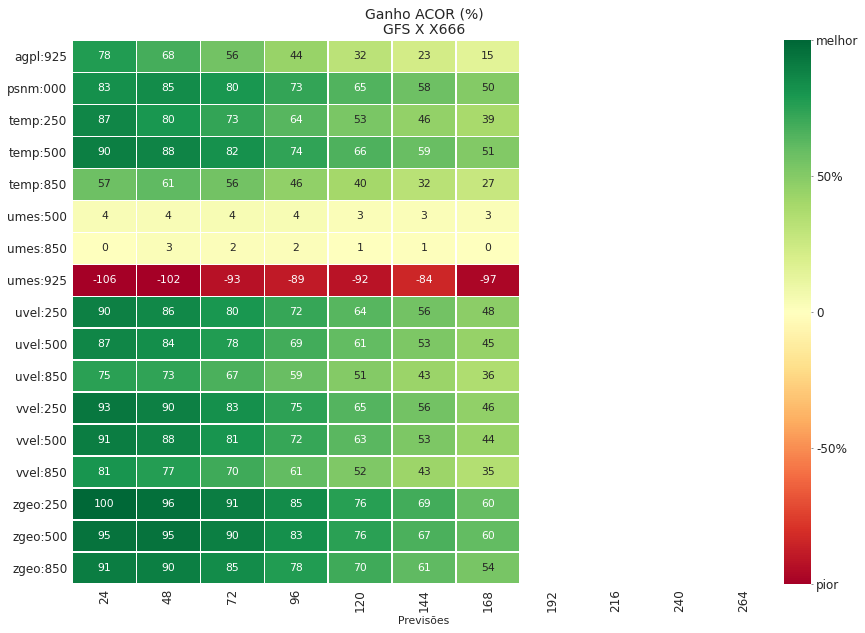

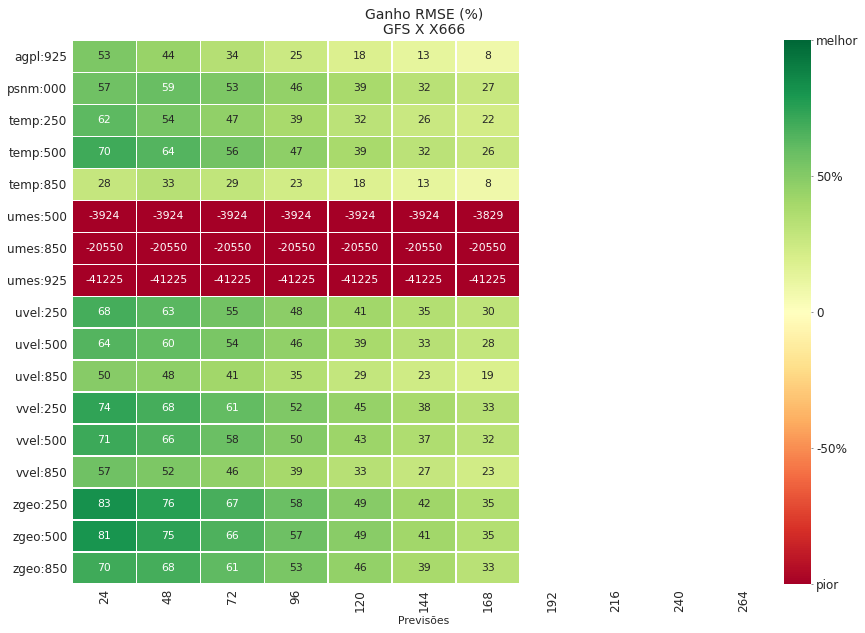

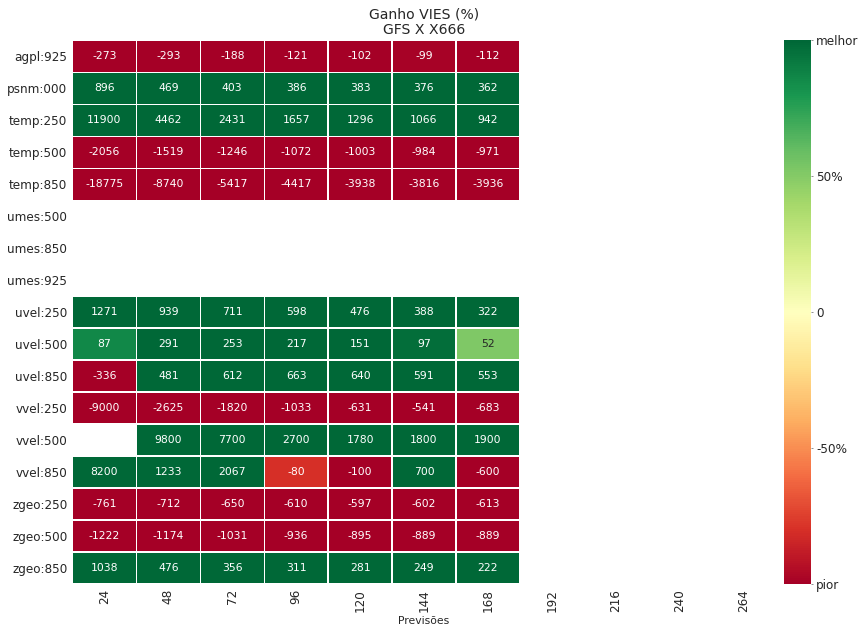

In [24]:
scanplot.plot_scorecard(dTable,Vars,Stats,'ganho',Exps,outDir)

Como indicado pela documentação, a função `plot_scorecard` está preparada para plotar os scorecards a partir do ganho percentual (indicado pelo parâmetro `ganho` passado para dentro da função) e a partir do mudança fracional (indicado pelo parâmetro `fc` passado para dentro da função). Veja no exemplo a seguir os scorecards da mudança fracional obtidos a partir das tabelas do SCANTEC, indicadas pelo parâmetro `Stats`:

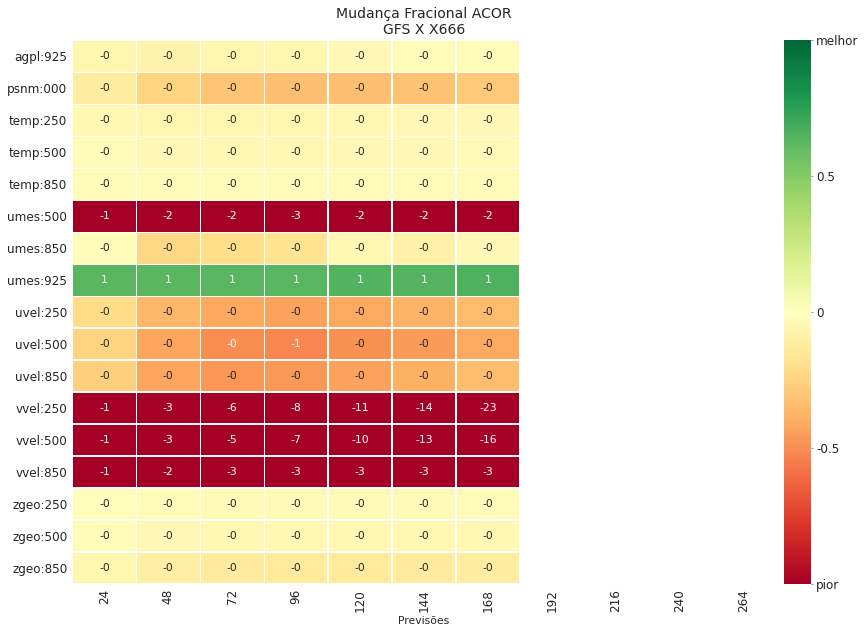

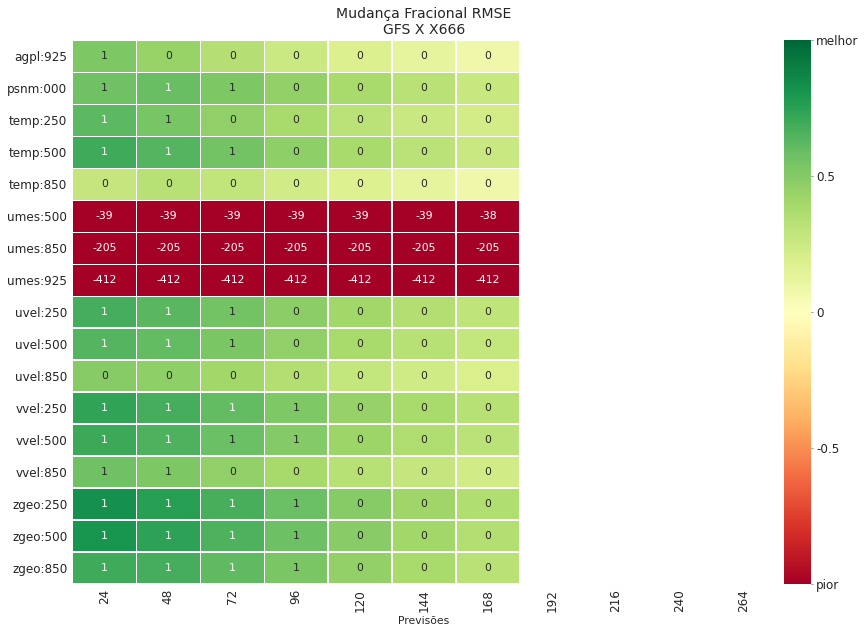

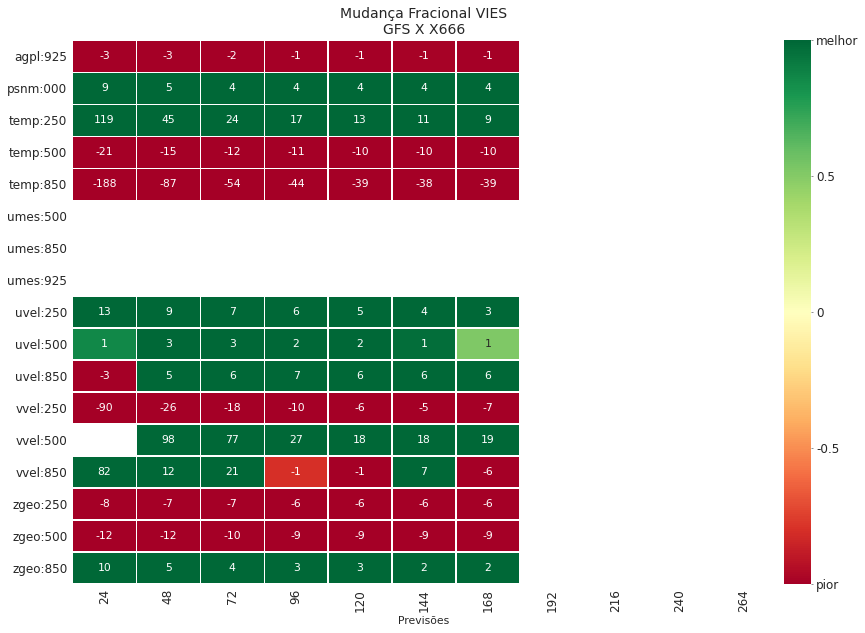

In [25]:
scanplot.plot_scorecard(dTable,Vars,Stats,'fc',Exps,outDir)

### plot_dTaylor

O diagrama de Taylor, semelhante ao scorecard, também possui a característica de resumir estatísticas básicas em um único diagrama. A função `plot_dTaylor` utiliza o módulo `SkillMetrics` (veja mais detalhes sobre este módulo em [SkillMetrics](https://pypi.org/project/SkillMetrics/)) para plotar o diagrama de Taylor a partir das tabelas do SCANTEC.

Para acessar a documentação da função `plot_dTaylor`, utilize o comando a seguir:

In [26]:
help(scanplot.plot_dTaylor)

Help on function plot_dTaylor in module plot_functions:

plot_dTaylor(dTable, data_conf, Vars, Stats, outDir)
    plot_dTaylor
    
    Esta função plota o diagrama de Taylor a partir das tabelas de estatísticas
    do SCANTEC, para um ou mais experimentos.
    
    Esta função utiliza o módulo SkillMetrics (https://pypi.org/project/SkillMetrics/). 
    
    Parâmetros de entrada
    ---------------------
        dTable    : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars      : lista com os nomes e níveis das variáveis
        data_conf : objeto dicionário com as configurações do SCANTEC
        Stats     : lista com os nomes das estatísticas a serem processadas
                    (são necessárias as tabelas ACOR, RMSE e VIES)
        outDir    : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        import scanplot 
        
   

A função `plot_dTaylor` permite que sejam selecionadas uma ou mais variáveis, as quais serão plotadas em diagramas separados. O mesmo acontece com os experimentos. Para ilustrar o uso da função `plot_dTaylor`, serão escolhidas duas variáveis dos experimentos avalidados pelo SCANTEC.

In [27]:
Vars = list(map(data_vars.get,[12,13]))

Observe o parâmetros `data_conf`, que é o dicionário criado e que contém as configurações do SCANTEC, inclusive os  prefixos (eg., `EXP01`, `EXP02` etc) dos experimentos:

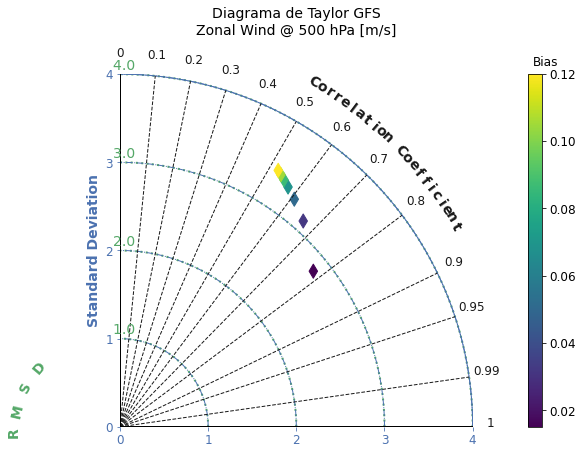

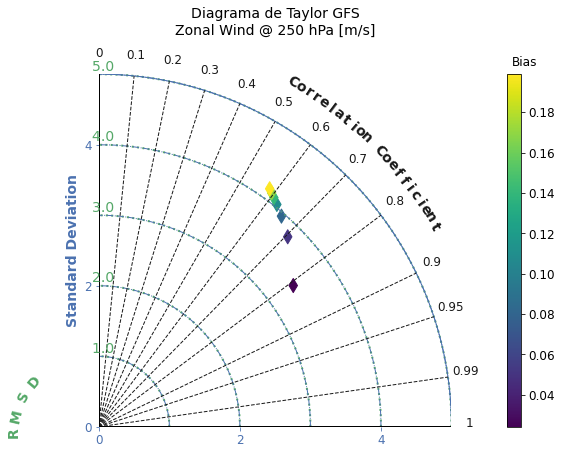

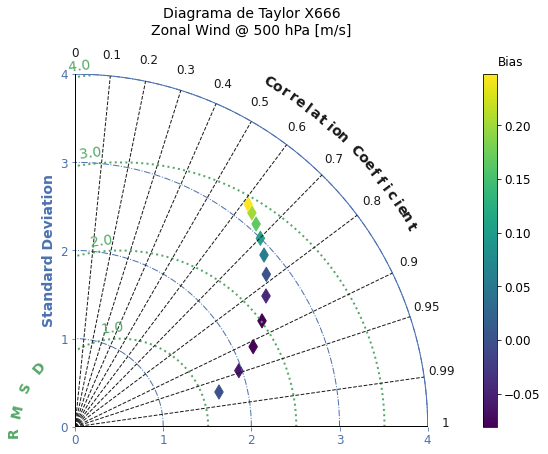

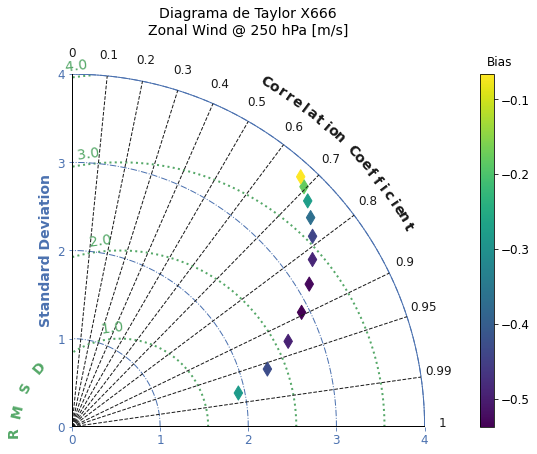

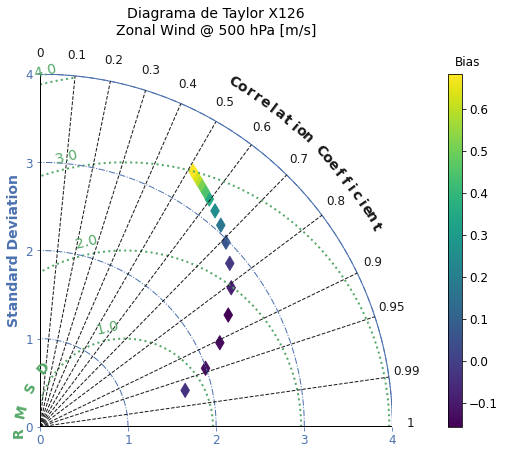

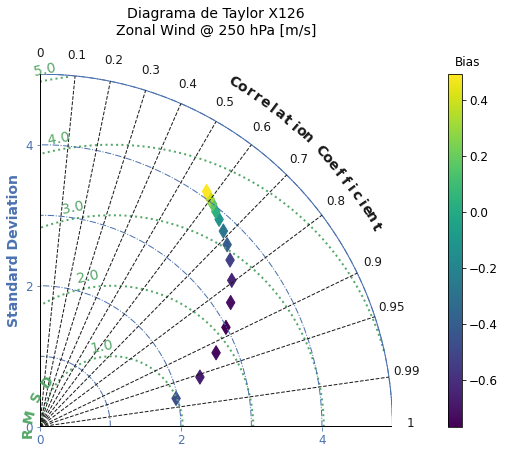

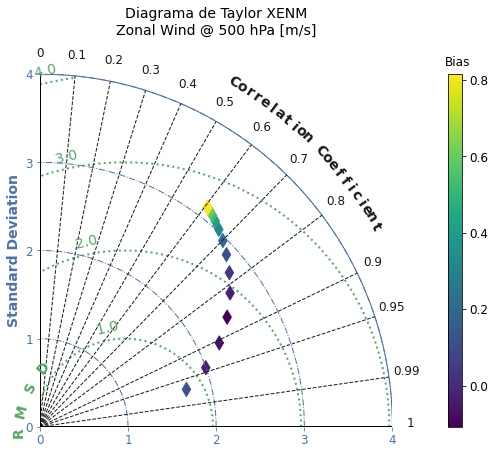

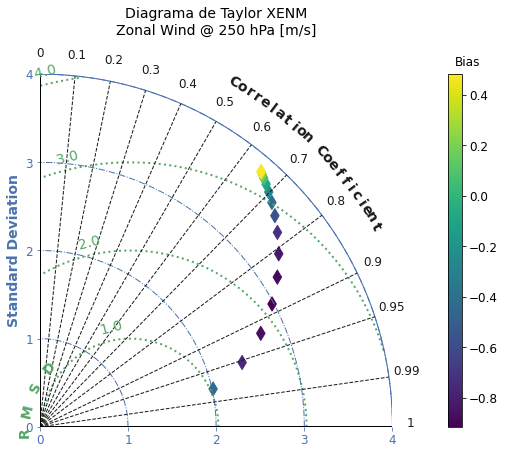

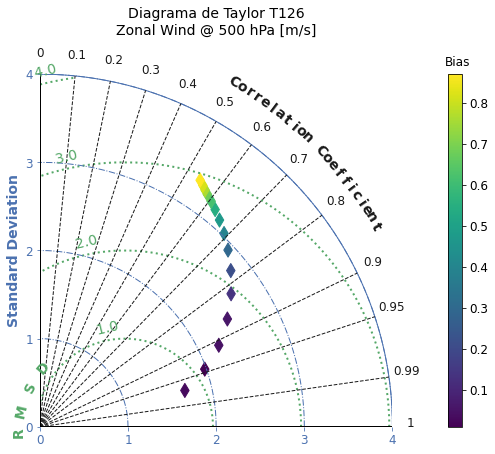

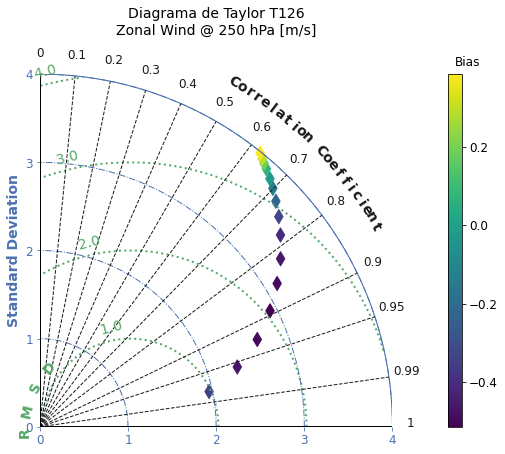

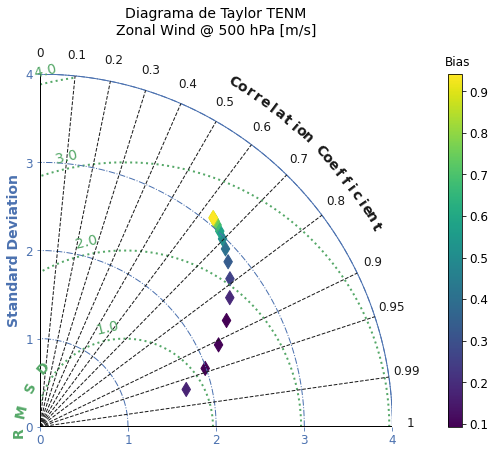

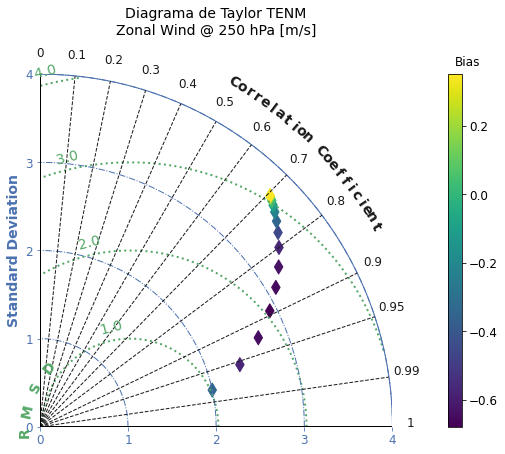

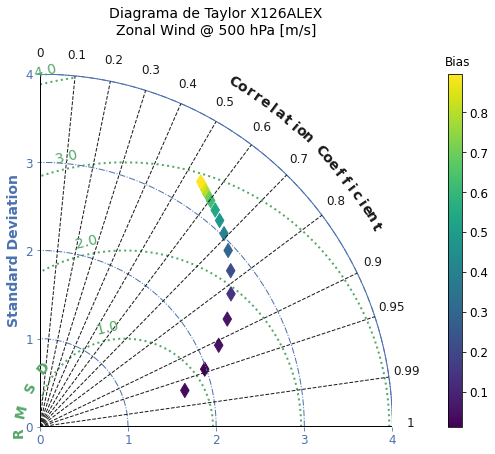

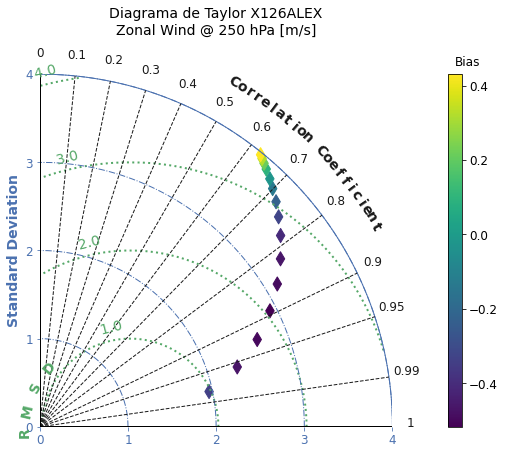

In [28]:
scanplot.plot_dTaylor(dTable,data_conf,Vars,Stats,outDir)

### plot_lines_tStudent

A partir das tabelas de correlação de anomalia do SCANTEC, é possível calcular a Transformada de Fisher e utilizar os valores da transformada para o cálculo do teste de significância. A função `plot_lines_tStudent` é utilizada para este propósito. Porém, diferentemente da função `plot_lines`, para usar a função `plot_lines_tStudent`, é necessário executar o SCANTEC para o período desejado e também para os intervalos do período desejado. Dessa forma, se a intenção do usuário é avaliar o modelo para o período entre 2020060100 e 2020083100, será necessário também realizar a avaliação para os intervalos de tempo entre estas duas datas, ie., com frequência cada 6, 12 ou 24 horas. Neste tipo de avaliação, no namelist `scantec.conf` as variáveis `Starting Time` e `Ending Time` são sempre iguais e elas podem ser atualizadas com o auxílio de algum script que se encarregue de calcular as novas datas.

Para acessar a documentação da função `plot_lines_tStudent`, basta utilizando o comando a seguir:

In [29]:
help(scanplot.plot_lines_tStudent)

Help on function plot_lines_tStudent in module plot_functions:

plot_lines_tStudent(Exps, ldrom_exp, ldrosup_exp, ldroinf_exp, varlev_exps)
    plot_lines_tStudent
    
    Esta função plota gráficos de linha acompanhados dos resultados do teste de significância t-Student.
    Os gráficos são plotados apenas com base nas tabelas de correlação de anomalia do SCANTEC.
    
    Parâmetros de entrada
    ---------------------
        Exps         : lista com os nomes dos experimentos
        ldrom_exp    : curva do teste referente ao experimento
        ldrosup_exp  : limite superior do teste
        ldroinf_exp  : limite inferior do teste
        varlev_exps  : dataframes com as variáveis dos experimentos
    
    Resultado
    ---------
        Resultado do teste de significância e valores críticos para serem utilizados pela função
        plot_lines_tStudent.
    
    Uso
    ---
        import scanplot 
        
        data_vars, data_conf = scanplot.read_namelists("~/SCANTEC")
      

Através da documentação da função, o usuário deve observar que é necessário utilizar as seguintes funções:

* `concat_tables_and_loc`
* `df_fill_nan`
* `calc_tStudent`

Estas funções são auxiliares à função `plot_lines_tStudent` e, nesta versão do SCANPLOT, elas devem ser aplicadas manualmente.

Para obter a documentação das funções, basta utilizar o comando `print(funcao.__doc__)` ou `help(funcao)`.

Embora o nome da função `plot_lines_tStudent` seja semelhante ao nome da função `plot_lines`, o seu uso e requerimentos são diferentes. A função `plot_lines_tStudent` foi preparada para plotar os gráficos de correlação de anomalia para uma lista de experimentos. Os valores de correlação de anomalia são utilizados para o cálculo do teste de significância t-Student, que permite verificar a significância estatísticas dos resultados apresentados pelas curvas, quanto à sua diferença.

Para a utilização da função `plot_lines_tStudent`, é necessário carregar as tabelas de correlação de anomalia calculadas pelo SCANTEC para os intervalos dentro do período de avaliação. Para isso, a função `get_dataframe` deve ser utilizada com a opção `series=True`:

In [30]:
dTable_series = scanplot.get_dataframe(dataInicial,dataFinal,Stats,Exps,outDir,series=True)

In [31]:
dTable_series

{'ACORGFS_20200601002020060100T.scan':    %Previsao  psnm:000  temp:850  temp:500  temp:250  umes:925  umes:850  \
 0          0     1.000     1.000     1.000     1.000     1.000     1.000   
 1         24     0.901     0.972     0.969     0.925     0.418     0.081   
 2         48     0.825     0.954     0.944     0.902     0.862     0.153   
 3         72     0.757     0.949     0.939     0.892     0.838     0.067   
 4         96     0.710     0.950     0.943     0.897     0.827     0.115   
 5        120     0.709     0.938     0.930     0.878     0.700     0.140   
 6        144     0.722     0.929     0.920     0.875     0.340     0.138   
 7        168     0.729     0.924     0.916     0.870     0.691     0.156   
 
    umes:500  agpl:925  zgeo:850  zgeo:500  zgeo:250  uvel:850  uvel:500  \
 0     1.000     1.000     1.000     1.000     1.000     1.000     1.000   
 1    -0.001     0.939     0.956     0.982     0.987     0.739     0.773   
 2     0.053     0.908     0.916     0.

As tabelas de avaliação do período geradas pelo SCANTEC, já foram previamente carregadas através do comando `dTable = get_dataframe(dataInicial,dataFinal,Stats,Exps,outDir,series=False)`.

Com o auxílio da função `concat_tables_and_loc`, serão criadas as listas concatenadas com todos os dataframes dos experimentos contendos os valores de correlação de anomalia nacessários. Na versão atual do SCANPLOT, apenas uma variável deverá ser avaliada. Para isso, a variável `Var` precisará ser definida da seguinte forma:

In [32]:
Var = Vars[0][0].lower()

In [33]:
varlev_exps = scanplot.concat_tables_and_loc(dTable,dataInicial,dataFinal,Exps,Var,series=False)

In [34]:
varlev_dia_exps = scanplot.concat_tables_and_loc(dTable_series,dataInicial,dataFinal,Exps,Var,series=True)

Dependendo dos experimentos avaliados, faz-se necessário normalizar o tamanho dos dataframes. No exemplo, os experimentos `GFS` e `X666`, possuem tamanhos diferentes quanto ao horizonte de previsões. No experimento `GFS`, são considerados 11 dias de previsões enquanto que no experimento `X666`, são considerados 13 dias. Nos demais experimentos (`T126`, `TENM`, `X126` e `XENM`), são considerados 15 dias de previsões.

Para normalizar o tamanho dos dataframes contidos nas listas `varlev_exps` e `varlev_dia_exps`, utiliza-se a função `df_fill_nan` do SCANPLOT, cujo resultados serão armazenados na lista `lst_varlev_dia_exps_rsp`.

In [35]:
lst_varlev_dia_exps_rsp = scanplot.df_fill_nan(varlev_exps,varlev_dia_exps)

Com as tabelas concatenadas e em lista, o próximo passo é realizar o cálculo das estatísticas do teste de significância t-Student. Para isso, internamente, o SCANPLOT utiliza os módulos `t` e `ttest_ind` do pacote `scipy.stats`. A função `calc_tStudent` do SCANTEC se encarrega dos procedimentos necessários para esta tarefa. Esta função, calcula os resultados do teste de significância a partir da Transformada de Fisher. Os resultados da aplicação da função, são os seguintes:

* `ldrom_exp`: uma lista com o valor médio do teste de significância (calculados a partir da média e da variância da transformada de Fisher) para cada experimento;
* `ldrosup_exp`: uma lista com os valores críticos superiores para cada experimento;
* `ldroinf_exp`: uma lista com os valores críticos inferiores para cada experimento;

In [36]:
ldrom_exp, ldrosup_exp, ldroinf_exp = scanplot.calc_tStudent(lst_varlev_dia_exps_rsp)

/scripts/das/conda/envs/DASSCANPLOT/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/scripts/das/conda/envs/DASSCANPLOT/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/scripts/das/conda/envs/DASSCANPLOT/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/scripts/das/conda/envs/DASSCANPLOT/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1997: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
/scripts/das/conda/envs/DASSCANPLOT/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1997: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


Finalmente, com as estatísticas do teste de significância calculados, pode-se aplicar a função `plot_lines_tStudent` para plotar os gráficos de correlação de anomalia com o teste de significância:

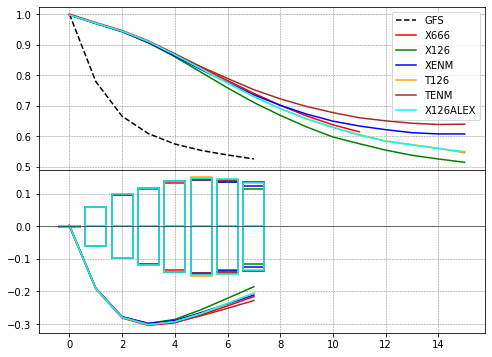

In [37]:
scanplot.plot_lines_tStudent(Exps,ldrom_exp,ldrosup_exp,ldroinf_exp,varlev_exps)

Na verificação acima, o teste de significância mostra que, em relação à referência `GFS` (curva pontilhada em preto), as diferenças entre as curvas (gráfico de cima, correlação de anomalia) são significativas quando as respectivas curvas de baixo estão fora (positivo ou negativo) dos retângulos que representam os valores críticos. Isso significa que as diferenças entre as correlações de anomalia, quando fora dos retângulos, são significativas com 95% de confiança.